In [9]:
import requests
import json
import os

#API call for fetching data
api_key = "f7254e102842b863d488c3a98c87e3fd"
city = "London"
url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"

# fetching weather data
response = requests.get(url)
data = response.json()

# logfile in json format
log_file = 'weather_data_log.json'

# handling for existing json data
if os.path.exists(log_file):
    # add new data to the existing log file every fetch from the API
    with open(log_file, 'r+') as file:
        existing_data = json.load(file)
        if not isinstance(existing_data, list):
            existing_data = [existing_data]
        existing_data.append(data)
        file.seek(0)
        json.dump(existing_data, file, indent=4)
else:
    # Create a new log file and write the data
    with open(log_file, 'w') as file:
        json.dump([data], file, indent=4)

print("Weather data has been logged to weather_data_log.json")


Weather data has been logged to weather_data_log.json


In [10]:
import json
import pandas as pd

# Check if the log file exists
if not os.path.exists(log_file):
    print("Log file does not exist.")
else:
    # Read the log file
    with open(log_file, 'r') as file:
        data_log = json.load(file)
    
    # Extract the required data
    data_list = []
    for entry in data_log:
        temp = entry['main']['temp']
        humidity = entry['main']['humidity']
        weather_description = entry['weather'][0]['description']
        timestamp = entry['dt']
        data_list.append({
            'Temperature': temp,
            'Humidity': humidity,
            'Weather Description': weather_description,
            'Timestamp': timestamp
        })
    
    # Create DataFrame
    df = pd.DataFrame(data_list)

    print(df)


    Temperature  Humidity Weather Description   Timestamp
0        280.20        93     overcast clouds  1735004647
1        280.20        93     overcast clouds  1735004647
2        280.20        93     overcast clouds  1735004647
3        280.13        94     overcast clouds  1735005099
4        280.13        94     overcast clouds  1735005099
5        280.17        94     overcast clouds  1735005545
6        280.33        94     overcast clouds  1735006934
7        280.33        94     overcast clouds  1735006934
8        280.33        94     overcast clouds  1735006934
9        280.46        93     overcast clouds  1735008098
10       280.73        93     overcast clouds  1735008751
11       280.73        93     overcast clouds  1735008751
12       280.73        93     overcast clouds  1735008751
13       280.73        93     overcast clouds  1735008751


In [ ]:
# pip install psycopg2 pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import json
import psycopg2
import pandas as pd

# postgre server connection parameters (localhost)
host = "localhost"
port = "5432"   
dbname = "weather_database"
user = "postgres"
password = "root"

# connection parameter
conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)
cur = conn.cursor()

# read the data from logfile from API fetch
log_file = 'weather_data_log.json'
with open(log_file, 'r') as file:
    data_log = json.load(file)

# insert data
for entry in data_log:
    temp = entry['main']['temp']
    humidity = entry['main']['humidity']
    weather_description = entry['weather'][0]['description']
    timestamp = entry['dt']

    cur.execute(
        "INSERT INTO etl_weather_database.weather_data (temperature, humidity, weather_description, timestamp) VALUES (%s, %s, %s, %s)",
        (temp, humidity, weather_description, timestamp)
    )

# Commit the changes and close the connection
conn.commit()
cur.close()
conn.close()

print("Weather data has been inserted into the PostgreSQL database.")


Weather data has been inserted into the PostgreSQL database.


Simple Data Analysis Script

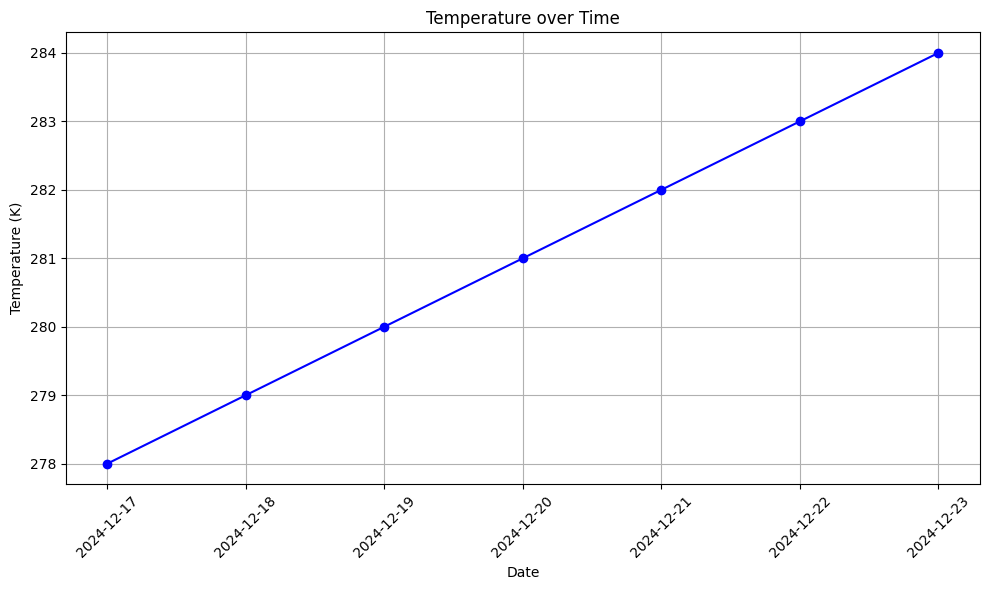

In [13]:
import datetime
import matplotlib.pyplot as plt


if not os.path.exists(log_file):
    print("Log file does not exist.")
else:
    # Read the log file
    with open(log_file, 'r') as file:
        data_log = json.load(file)
    
    # Extract the required data
    data_list = []
    for entry in data_log:
        temp = entry['main']['temp']
        humidity = entry['main']['humidity']
        weather_description = entry['weather'][0]['description']
        timestamp = entry['dt']
        data_list.append({
            'Temperature': temp,
            'Humidity': humidity,
            'Weather Description': weather_description,
            'Timestamp': timestamp
        })
# Example weather data (temperature and date)
weather_data = [
    {"date": "2024-12-17", "temperature": 278},
    {"date": "2024-12-18", "temperature": 279},
    {"date": "2024-12-19", "temperature": 280},
    {"date": "2024-12-20", "temperature": 281},
    {"date": "2024-12-21", "temperature": 282},
    {"date": "2024-12-22", "temperature": 283},
    {"date": "2024-12-23", "temperature": 284},
]

# Extract dates and temperatures
dates = [datetime.datetime.strptime(record["date"], "%Y-%m-%d") for record in weather_data]
temperatures = [record["temperature"] for record in weather_data]

# Plotting the temperature over time
plt.figure(figsize=(10, 6))
plt.plot(dates, temperatures, marker='o', linestyle='-', color='b')

# Formatting the plot
plt.title('Temperature over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (K)')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
